In [1]:
import json
import os
import numpy as np
import time
from sklearn.decomposition import PCA
from sklearn import manifold
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy import stats
import random

In [2]:
def load_data(path):
    data = []
    res = []
    if path.endswith('json'):
        with open(path, 'r') as f:
            data = json.loads(f.readline())
    return data

def get_data_by_idx(data, idx):
    print('get data by idx: ', idx)
    res = []
    for i in idx:
        res.append(data[i])
    print('number of items: ', len(res))
    return res

def show_idbench_data(data):
    for i in range(1):
        for j in range(len(data[i])):
            print(data[i][j][0])
            print(data[i][j][1][0], data[i][j][2][0])

In [3]:
def get_tokens(info):
    toks = []
    for i in info:
        if i[1] not in toks:
            toks.append(i[1])
        if i[3] not in toks:
            toks.append(i[3])
    return toks

def build_pca_data(data, idx):
    res_idx = []
    res_features = []
    for i in range(len(data)):
        for j in range(len(data[i])):
            res_idx.append([idx[i], j])
            res_features.append(data[i][j])
    # print(res_features[0])
    return res_idx, res_features
        
def pca(data):
    # data as a list
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(data)
    return principalComponents

def tsne(data):
    tsne = manifold.TSNE(n_components=2, init='pca', random_state=501)
    X_tsne = tsne.fit_transform(data)
    return X_tsne

def visualize(data, info, idx, show_all=True, show_label=False):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component TSNE', fontsize = 20)
    
    targets = idx
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    colors = colors[:len(targets)]
    
    for target, color in zip(targets, colors):
        x = []
        y = []
        labels = []
        for i in range(len(info)):
            if info[i][0] == target:
                x.append(data[i][0])
                y.append(data[i][1])
                labels.append(info[i][1])
        
        ax.scatter(x, y, c = color, s = 20)
        
        if show_label:
            for i, txt in enumerate(labels):
                ax.annotate(txt, (x[i], y[i]))
                
    
    ax.legend(targets)

    '''
    for i in info:
        
        x = [i[0] for i in data]
        y = [i[1] for i in data]
    
    ax.scatter(x, y)
    '''
    ax.grid()

In [4]:
data_path = './results/val_embedding.json'


def analyze_graph_with_idx_in_local(idx=[0, 1, 2]):
    data = load_data(data_path)
    fd = get_data_by_idx(data, idx)
    fd_idx, fd_ebd = build_pca_data(fd, idx)
    tsne_fd = tsne(fd_ebd)
    # print(tsne_fd)
    # print(fd_context)
    visualize(tsne_fd, fd_idx, idx)
    
    
def analyze_idbench_with_tok_equal_in_global():
    idbench_data_path = './idbench_res_id2vec-textcnn_js_2_epoch_4_with_embeddings.json'
    idbench_data = load_data(idbench_data_path)
    # show_idbench_data(idbench_data)
    # fd = get_data_by_token(idbench_data, 'equal')
    fd_context, fd_ebd = build_pca_data(idbench_data)
    pca_fd = pca(fd_ebd)
    # print(pca_fd)
    # print(fd_context)
    info = fd_context
    # tokens = get_tokens(info)
    tokens = ['- - - ', 'equal', 'ok', 'eql', 'cut']
    visualize(pca_fd, fd_context, tokens)
    visualize(pca_fd, fd_context, tokens, show_all=True, show_label=False)


get data by idx:  [0, 1, 2]
number of items:  3


/Users/jiaxingzhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/jiaxingzhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


get data by idx:  [0, 1]
number of items:  2


/Users/jiaxingzhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/jiaxingzhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


get data by idx:  [0, 2, 4]
number of items:  3


/Users/jiaxingzhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/jiaxingzhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


get data by idx:  [0, 5, 6, 7, 8]
number of items:  5


/Users/jiaxingzhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/jiaxingzhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


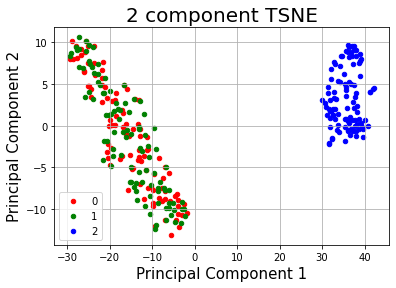

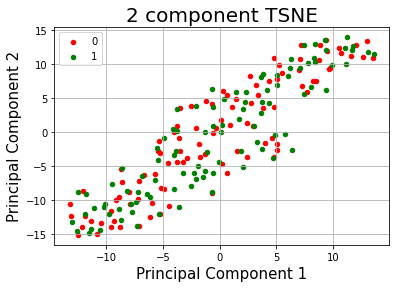

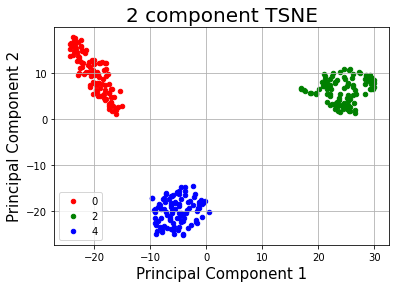

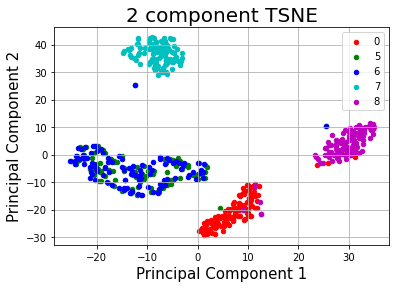

In [5]:
analyze_graph_with_idx_in_local()
analyze_graph_with_idx_in_local([0, 1])
analyze_graph_with_idx_in_local([0, 2, 4])
analyze_graph_with_idx_in_local([0, 5, 6, 7, 8])